In [1]:
# 기본 데이터 라이브러리 로드
import sys # 시스템 파라미터에 접근할 수 있게 도와준다.
print("Python version: {}". format(sys.version))

import pandas as pd # 데이터 정제에 도움을 주는 라이브러리
print("pandas version: {}". format(pd.__version__))

import matplotlib # 매트랩에서 사용하는 시각화 도구를 사용할 수 있게 도와주는 시각화 도구
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np # 행렬 계산을 위해 필요한 라이브러리
print("NumPy version: {}". format(np.__version__))

import scipy as sp # 수학 관련 함수가 내장된 라이브러리
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display # 주피터 노트북에서 예쁘게 시각화 해주는 도구
print("IPython version: {}". format(IPython.__version__)) 

import sklearn # 각종 통계 도구와 머신 러닝 알고리즘이 내장되어 있는 라이브러리
print("scikit-learn version: {}". format(sklearn.__version__))

import tensorflow as tf
print("tensorflow version: {}".format(tf.__version__))

import geopandas as gpd # 공간정보 라이브러리
print("geopandas version: {}".format(gpd.__version__))

# 파이썬 내장 라이브러리
import random
import datetime
import time
import os
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import copy

# 모델링 라이브러리, 수학 계산 툴 로드
# 일반적인 모델링 라이브러리
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

# 모델링 시 헬퍼 함수들
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

# interpolation 함수
import scipy.interpolate as spi
from scipy import stats

# model load
import pickle
# from sklearn.externals import joblib

# 시각화 도구
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

# 시각화 도구 default 세팅
# 주피터 노트북에서 plot 결과를 볼 수 있게 해준다.
%matplotlib inline
mpl.style.use('ggplot') # matplotlib에서 plot되는 결과를 선택할 수 있다.
sns.set_style('white') # seaborn에서 사용할 style을 설정할 수 있다.
pylab.rcParams['figure.figsize'] = 12,8 # plot의 크기와 선 등의 기본 값을 설정할 수 있다.

plt.style.use(['fivethirtyeight'])
sns.set_style('darkgrid')

from IPython.display import display #print가 아닌 display()로 연속 출력
from IPython.display import HTML #출력 결과를 HTML로 생성
import fiona #공간데이터를 딕셔너리 형태 등으로 접근할 수 있는 라이브러리

# 좌표계 정의/변환용 라이브러리
import pyproj

# 좌표간의 거리 구하기 위한 라이브러리
from haversine import haversine

# Jupyter Notebook 이나 ipython 을 사용하다보면 향후 버전이 올라갈 때 변경될 사항 등을 알려주는 경고 메시지(warning message)를 뜨지 않게 해준다.
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

# 뒤에서 overlay를 활용하기 위함. 설치 후 런타임 다시 시작할 것
import rtree
import pathlib
#from geoband import API

import mapclassify

Python version: 3.8.8 (tags/v3.8.8:024d805, Feb 19 2021, 13:18:16) [MSC v.1928 64 bit (AMD64)]
pandas version: 1.4.3
matplotlib version: 3.5.2
NumPy version: 1.22.4
SciPy version: 1.8.1
IPython version: 8.4.0
scikit-learn version: 1.1.1
tensorflow version: 2.9.1
geopandas version: 0.11.0
-------------------------


In [2]:
df = pd.read_csv("dataset\전국_심야약국.csv", encoding='cp949', header=1)
df = df[df['도로명주소'].str.startswith("서울")]
df = df.reset_index(drop=1)
df = df.drop('지번주소', axis=1)
df

약국명          대표전화                                            도로명주소  \
0    365열린약국   02-874-2332                      서울특별시 관악구 남부순환로 1615  (신림동)   
1    365열린약국  02-3666-0784        서울특별시 구로구 남부순환로97길 3, KS프리미어빌딩 105호 (개봉동)   
2    365열린약국  02-2633-2800  서울특별시 영등포구 영중로 119, 리마크빌 영등포 2층 204-2호 (영등포동8가)   
3    365정화약국   02-935-4869             서울특별시 노원구 상계로 59, 동익빌딩 1층 7,8호 (상계동)   
4    365종로약국  02-2215-8704                   서울특별시 동대문구 전농로 60-1, 1층 (답십리동)   
..       ...           ...                                              ...   
174  홍대어울림약국   02-332-9233                    서울특별시 마포구 어울마당로 128, 1층 (서교동)   
175  홍대참신한약국  02-6368-5799                     서울특별시 마포구 어울마당로 62, 1층 (서교동)   
176  화랑온누리약국   02-975-4151                       서울특별시 노원구 공릉로 150 (공릉동) 1층   
177   환승센터약국   02-424-2365   서울특별시 송파구 잠실로 지하 156, 잠실광역환승센터 지하1층 101호 (신천동)   
178     흥명약국   02-963-0617                     서울특별시 동대문구 고산자로30길 56, (용두동)   

             월요일          화요일          수요일          목요일          금요일  \
0    09:00~23:00  09:00~23:00  09:00~23:00  09:00~23:00  09:00~23:00   
1    08:30~22:30  08:30~22:30  08:30~22:30  08:30~22:30  08:30~22:30   
2    09:00~23:00  09:00~23:00  09:00~23:00  09:00~23:00  09:00~23:00   
3    09:00~23:00  09:00~23:00  09:00~23:00  09:00~23:00  09:00~23:00   
4    08:00~24:00  08:00~24:00  08:00~24:00  08:00~24:00  08:00~24:00   
..           ...          ...          ...          ...          ...   
174  11:00~22:30  11:00~22:30  11:00~22:30  11:00~22:30  11:00~22:30   
175  12:00~23:00  12:00~23:00  12:00~23:00  12:00~23:00  12:00~25:00   
176  08:45~22:30  08:45~22:30  08:45~22:30  08:45~22:30  08:45~22:00   
177  08:00~23:00  08:00~23:00  08:00~23:00  08:00~23:00  08:00~23:00   
178  10:30~23:00  10:30~23:00  10:30~23:00  10:30~23:00  10:30~23:00   

             토요일          일요일          공휴일  
0    09:00~23:00  10:00~23:00  10:00~23:00  
1    08:30~22:30  08:30~22:30  08:30~22:30  
2    09:00~23:00  09:00~23:00  09:00~23:00  
3    09:00~23:00  13:00~23:00  13:00~23:00  
4    08:00~24:00  08:00~24:00  08:00~24:00  
..           ...          ...          ...  
174  11:00~22:30  11:00~22:30          NaN  
175  12:00~25:00  12:00~23:00  12:00~23:00  
176  08:45~22:00  17:00~22:30          NaN  
177  09:00~23:00  09:00~23:00  09:00~23:00  
178  10:30~23:00  14:00~22:30          NaN  

[179 rows x 11 columns]

In [3]:
#df.to_csv("dataset/Seoul_pharmacy.csv", index=False)

---

In [4]:
df = pd.read_csv("dataset\PreprocessData\Seoul_pharmacy.csv")
df

FileNotFoundError: [Errno 2] No such file or directory: 'dataset\\PreprocessData\\Seoul_pharmacy.csv'

In [ ]:
import pandas as pd
from collections import OrderedDict
import geopandas
import libpysal
from libpysal import cg, examples
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
import matplotlib_scalebar
from matplotlib_scalebar.scalebar import ScaleBar
import numpy
import ortools
from ortools.linear_solver import pywraplp
import seaborn
import shapely
from shapely.geometry import Point
import spaghetti
import sys

%matplotlib inline

# 한글폰트
import os
from matplotlib import font_manager, rc
path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False 

import numpy as np
import folium

In [ ]:
emd = geopandas.read_file('dataset\EMD_20220324\emd.shp', encoding = 'euc-kr')
emd = emd.to_crs(epsg=4326)
sig = geopandas.read_file('dataset\SIG_20220324\sig.shp', encoding = 'euc-kr')
sig = sig.to_crs(epsg=4326)

In [ ]:
seoul_EMD = emd[emd['EMD_CD'].str.startswith('11')]
seoul_sig = sig[sig['SIG_CD'].str.startswith('11')]

display(seoul_EMD.head())
display(seoul_sig.head())

EMD_CD       EMD_ENG_NM EMD_KOR_NM  \
0  11110101    Cheongun-dong        청운동   
1  11110102      Singyo-dong        신교동   
2  11110103   Gungjeong-dong        궁정동   
3  11110104       Hyoja-dong        효자동   
4  11110105  Changseong-dong        창성동   

                                            geometry  
0  POLYGON ((126.97556 37.58968, 126.97549 37.589...  
1  POLYGON ((126.97031 37.58418, 126.97033 37.584...  
2  POLYGON ((126.97400 37.58654, 126.97401 37.586...  
3  POLYGON ((126.97356 37.58323, 126.97355 37.582...  
4  POLYGON ((126.97353 37.58182, 126.97354 37.581...

SIG_CD    SIG_ENG_NM SIG_KOR_NM  \
0  11110     Jongno-gu        종로구   
1  11140       Jung-gu         중구   
2  11170    Yongsan-gu        용산구   
3  11200  Seongdong-gu        성동구   
4  11215   Gwangjin-gu        광진구   

                                            geometry  
0  POLYGON ((127.00864 37.58047, 127.00871 37.580...  
1  POLYGON ((127.02314 37.57196, 127.02336 37.571...  
2  POLYGON ((126.96918 37.55566, 126.96917 37.554...  
3  POLYGON ((127.04341 37.57234, 127.04524 37.571...  
4  POLYGON ((127.10166 37.57240, 127.10224 37.572...

0      126.930087
1      126.858255
2      126.905231
3      127.061515
4      127.057409
          ...    
174    126.924295
175    126.921429
176    127.079576
177    127.101753
178    127.041324
Name: X, Length: 179, dtype: float64

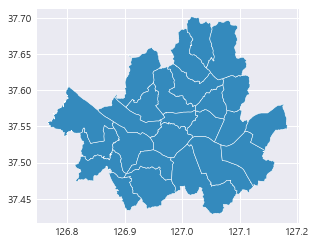

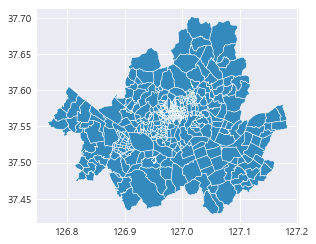

In [ ]:
seoul_sig.plot()
seoul_EMD.plot()

In [ ]:
df2.head(1)

약국명         대표전화                        도로명주소          월요일  \
0  365열린약국  02-874-2332  서울특별시 관악구 남부순환로 1615  (신림동)  09:00~23:00   

           화요일          수요일          목요일          금요일          토요일  \
0  09:00~23:00  09:00~23:00  09:00~23:00  09:00~23:00  09:00~23:00   

           일요일          공휴일           X          Y  
0  10:00~23:00  10:00~23:00  126.930087  37.484556

In [ ]:
df['경도'] = df['X'].astype(float)
df['위도'] = df['Y'].astype(float)
df['geometry'] = df.apply(lambda row : Point([row['경도'], row['위도']]), axis=1)
df = gpd.GeoDataFrame(df, geometry='geometry')

df = df.drop('X', axis=1)
df = df.drop('Y', axis=1)
df.head()

약국명          대표전화                                            도로명주소  \
0  365열린약국   02-874-2332                      서울특별시 관악구 남부순환로 1615  (신림동)   
1  365열린약국  02-3666-0784        서울특별시 구로구 남부순환로97길 3, KS프리미어빌딩 105호 (개봉동)   
2  365열린약국  02-2633-2800  서울특별시 영등포구 영중로 119, 리마크빌 영등포 2층 204-2호 (영등포동8가)   
3  365정화약국   02-935-4869             서울특별시 노원구 상계로 59, 동익빌딩 1층 7,8호 (상계동)   
4  365종로약국  02-2215-8704                   서울특별시 동대문구 전농로 60-1, 1층 (답십리동)   

           월요일          화요일          수요일          목요일          금요일  \
0  09:00~23:00  09:00~23:00  09:00~23:00  09:00~23:00  09:00~23:00   
1  08:30~22:30  08:30~22:30  08:30~22:30  08:30~22:30  08:30~22:30   
2  09:00~23:00  09:00~23:00  09:00~23:00  09:00~23:00  09:00~23:00   
3  09:00~23:00  09:00~23:00  09:00~23:00  09:00~23:00  09:00~23:00   
4  08:00~24:00  08:00~24:00  08:00~24:00  08:00~24:00  08:00~24:00   

           토요일          일요일          공휴일          경도         위도  \
0  09:00~23:00  10:00~23:00  10:00~23:00  126.930087  37.484556   
1  08:30~22:30  08:30~22:30  08:30~22:30  126.858255  37.493996   
2  09:00~23:00  09:00~23:00  09:00~23:00  126.905231  37.526766   
3  09:00~23:00  13:00~23:00  13:00~23:00  127.061515  37.656160   
4  08:00~24:00  08:00~24:00  08:00~24:00  127.057409  37.570289   

                     geometry  
0  POINT (126.93009 37.48456)  
1  POINT (126.85826 37.49400)  
2  POINT (126.90523 37.52677)  
3  POINT (127.06152 37.65616)  
4  POINT (127.05741 37.57029)

In [ ]:
df.columns

Index(['약국명', '대표전화', '도로명주소', '월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일',
       '공휴일', '경도', '위도', 'geometry'],
      dtype='object')

In [ ]:
print(seoul_EMD.crs)
print(df.crs)
df.crs = {'init':'epsg:4326'}
print(df.crs)
df = df.to_crs({'init':'epsg:5179'})
print(df.crs)

epsg:4326
None
+init=epsg:4326 +type=crs
+init=epsg:5179 +type=crs


In [ ]:
seoul_EMD = seoul_EMD.to_crs({'init':'epsg:5179'})

In [ ]:
seoul_sig = seoul_sig.to_crs({'init':'epsg:5179'})

In [ ]:
print(seoul_EMD.crs)

+init=epsg:5179 +type=crs


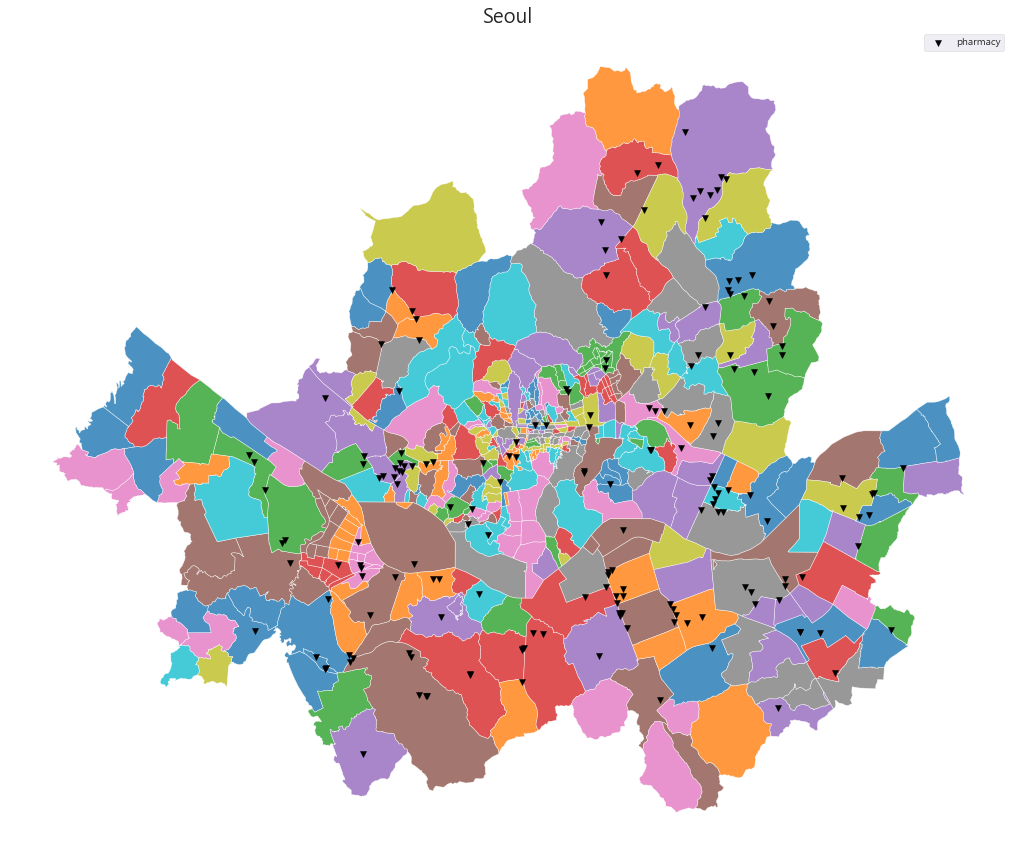

In [ ]:
ax = seoul_EMD.plot(column="EMD_KOR_NM", figsize=(16,16), alpha=0.8)
df.plot(ax=ax, marker='v', color='black', label='pharmacy')
ax.set_title("Seoul", fontsize=20)
ax.set_axis_off()
plt.legend()
plt.show()

In [ ]:
seoul_sig

SIG_CD       SIG_ENG_NM SIG_KOR_NM  \
0   11110        Jongno-gu        종로구   
1   11140          Jung-gu         중구   
2   11170       Yongsan-gu        용산구   
3   11200     Seongdong-gu        성동구   
4   11215      Gwangjin-gu        광진구   
5   11230    Dongdaemun-gu       동대문구   
6   11260      Jungnang-gu        중랑구   
7   11290      Seongbuk-gu        성북구   
8   11305       Gangbuk-gu        강북구   
9   11320        Dobong-gu        도봉구   
10  11350         Nowon-gu        노원구   
11  11380     Eunpyeong-gu        은평구   
12  11410     Seodaemun-gu       서대문구   
13  11440          Mapo-gu        마포구   
14  11470     Yangcheon-gu        양천구   
15  11500       Gangseo-gu        강서구   
16  11530          Guro-gu        구로구   
17  11545     Geumcheon-gu        금천구   
18  11560  Yeongdeungpo-gu       영등포구   
19  11590       Dongjak-gu        동작구   
20  11620        Gwanak-gu        관악구   
21  11650        Seocho-gu        서초구   
22  11680       Gangnam-gu        강남구   
23  11710        Songpa-gu        송파구   
24  11740      Gangdong-gu        강동구   

                                             geometry  
0   POLYGON ((956615.453 1953567.199, 956621.579 1...  
1   POLYGON ((957890.386 1952616.746, 957909.908 1...  
2   POLYGON ((953115.761 1950834.084, 953114.206 1...  
3   POLYGON ((959681.109 1952649.605, 959842.412 1...  
4   POLYGON ((964825.058 1952633.250, 964875.565 1...  
5   POLYGON ((962141.919 1956519.461, 962149.853 1...  
6   POLYGON ((965698.531 1957987.355, 965772.290 1...  
7   POLYGON ((956787.318 1953542.506, 956761.258 1...  
8   POLYGON ((956316.789 1965175.345, 956401.551 1...  
9   POLYGON ((957223.835 1961199.545, 957195.758 1...  
10  POLYGON ((965666.474 1959953.152, 965671.165 1...  
11  POLYGON ((951637.438 1961851.784, 951649.915 1...  
12  POLYGON ((951688.107 1956065.481, 951687.602 1...  
13  POLYGON ((946043.982 1954091.886, 946130.912 1...  
14  POLYGON ((944706.568 1949917.649, 944717.625 1...  
15  POLYGON ((939006.015 1955916.461, 939036.124 1...  
16  POLYGON ((945165.294 1946679.190, 945362.702 1...  
17  POLYGON ((944705.924 1943086.537, 944706.472 1...  
18  POLYGON ((945280.001 1950949.319, 945361.246 1...  
19  POLYGON ((951811.770 1946444.671, 951885.519 1...  
20  POLYGON ((949438.997 1944127.713, 949456.647 1...  
21  POLYGON ((956982.039 1947144.037, 956982.518 1...  
22  POLYGON ((959331.597 1948602.068, 959342.021 1...  
23  POLYGON ((965821.957 1949386.153, 965816.737 1...  
24  POLYGON ((971595.075 1952405.815, 971596.036 1...

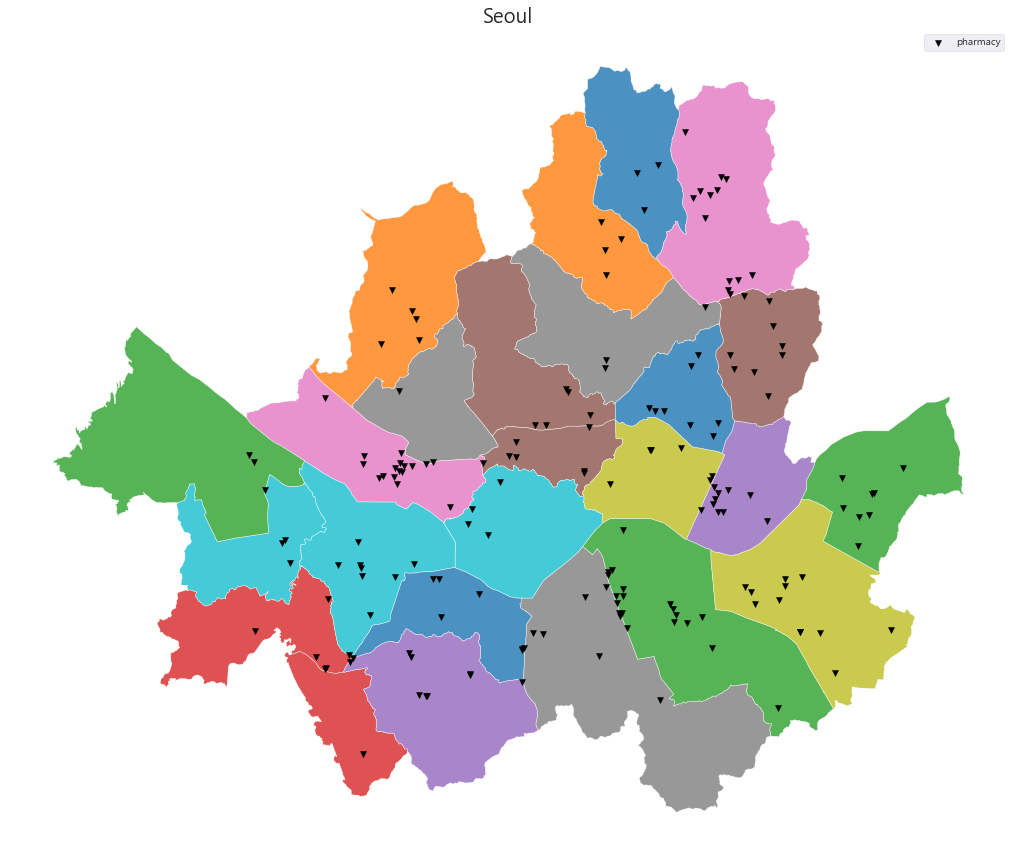

In [ ]:
ax = seoul_sig.plot(column="SIG_ENG_NM", figsize=(16,16), alpha=0.8)
df.plot(ax=ax, marker='v', color='black', label='pharmacy')
ax.set_title("Seoul", fontsize=20)
ax.set_axis_off()
plt.legend()
plt.show()

---
서울시 약국 위치 표시

In [206]:
pharmacy = pd.read_csv('DataSet\서울시 약국 운영시간 정보.csv',encoding='ANSI')
pharmacy.head(1)

#가져온 데이터가 기존에 5179좌표계여서 set_crs만 진행
pharmacy = geopandas.GeoDataFrame(pharmacy, geometry=geopandas.points_from_xy(pharmacy['병원경도'], pharmacy['병원위도']))
pharmacy.head(2)

pharmacy.crs = {'init':'epsg:4326'}
pharmacy = pharmacy.to_crs({'init':'epsg:5179'})

In [207]:
#위도 및 경도 차이가 0.000002 이하인 것이 약 165개 (심야약국 개수)
temp = []
for i in range(len(pharmacy)):
    for j in range(len(df)):
        if abs(pharmacy['병원경도'][i] - df['경도'][j]) < 0.000002 or abs(pharmacy['병원위도'][i] - df['위도'][j]) < 0.000002:
            temp.append(i)

In [ ]:
pharmacy2 = pharmacy.drop(temp)
pharmacy2 = pharmacy2.reset_index()

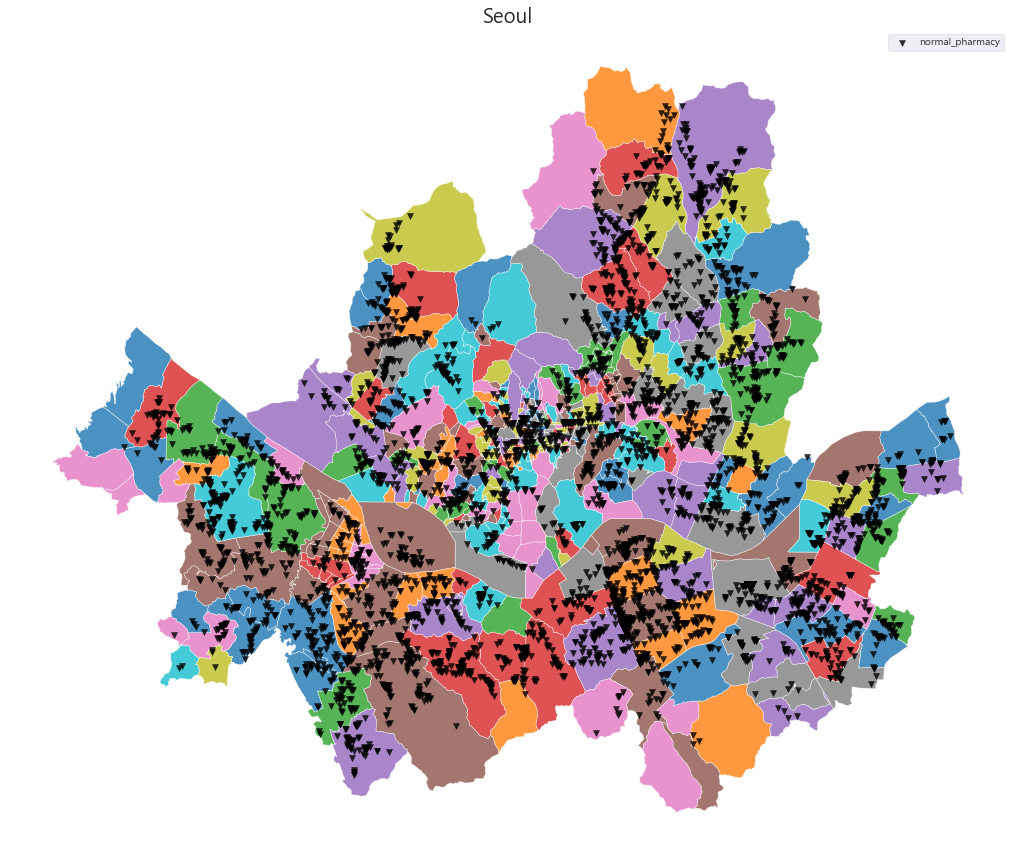

In [32]:
ax = seoul_EMD.plot(column="EMD_KOR_NM", figsize=(16,16), alpha=0.8)
pharmacy2.plot(ax=ax, marker='v', color='black', label='normal_pharmacy', alpha=0.8)
ax.set_title("Seoul", fontsize=20)
ax.set_axis_off()
plt.legend()
plt.show()

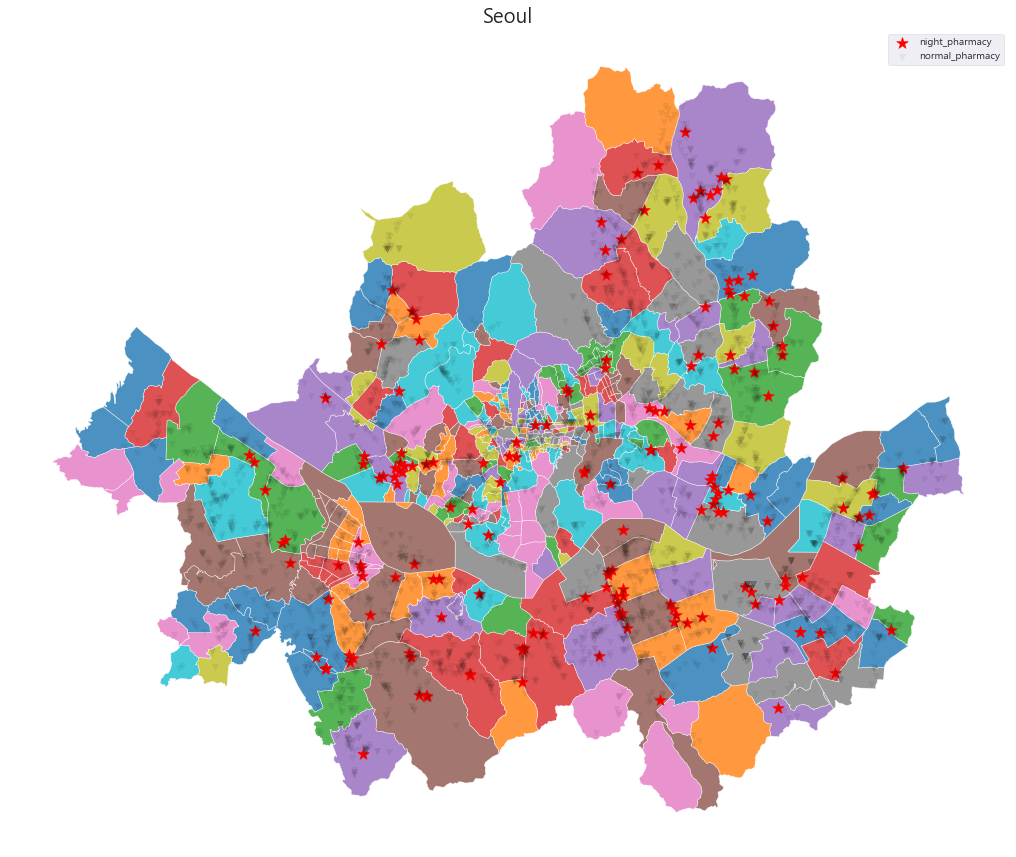

In [47]:
ax = seoul_EMD.plot(column="EMD_KOR_NM", figsize=(16,16), alpha=0.8)
df.plot(ax=ax, marker='*', color='red', label='night_pharmacy', markersize=150)
pharmacy2.plot(ax=ax, marker='v', color='black', label='normal_pharmacy', alpha=0.05)
ax.set_title("Seoul", fontsize=20)
ax.set_axis_off()
plt.legend()
plt.show()

---
편의점 위치 표시

In [79]:
convenience = pd.read_csv('DataSet\서울시 안전상비의약품 판매업소 인허가 정보.csv',encoding='ANSI')
convenience = geopandas.GeoDataFrame(convenience, geometry=geopandas.points_from_xy(convenience['좌표정보(X)'], convenience['좌표정보(Y)']))
convenience = convenience.set_crs(epsg=2097)
convenience = convenience.to_crs({'init':'epsg:5179'})
convenience.head(1)

개방자치단체코드                       관리번호     인허가일자  인허가취소일자  영업상태코드 영업상태명  \
0   3240000  PHMH320193240033087500009  20190321      NaN       3    폐업   

   상세영업상태코드 상세영업상태명        폐업일자  휴업시작일자  ...  도로명우편번호      사업장명  \
0         3      폐업  20211102.0     NaN  ...   5335.0  씨유천호로데오점   

           최종수정일자  데이터갱신구분                데이터갱신일자 업태구분명        좌표정보(X)  \
0  20211102141603        U  2021-11-04 02:40:00.0   NaN  211148.708405   

         좌표정보(Y) 판매점영업면적                        geometry  
0  448411.952348    50.0  POINT (966785.711 1948796.705)  

[1 rows x 27 columns]

In [89]:
convenience2 = convenience[convenience['영업상태명'] != "폐업"]

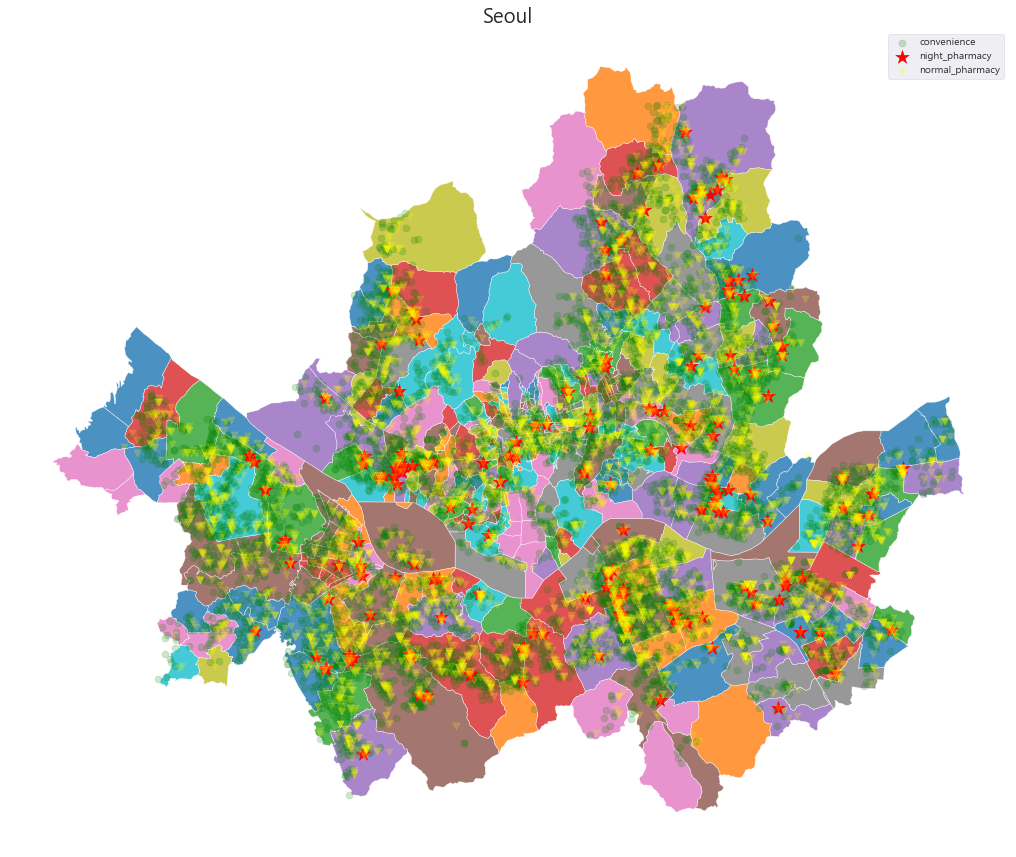

In [91]:
ax = seoul_EMD.plot(column="EMD_KOR_NM", figsize=(16,16), alpha=0.8)
convenience2.plot(ax=ax, marker='o', color='green', label='convenience', alpha=0.2, markersize=50)
df.plot(ax=ax, marker='*', color='red', label='night_pharmacy', markersize=200)
pharmacy2.plot(ax=ax, marker='v', color='yellow', label='normal_pharmacy', alpha=0.2, markersize=50)
ax.set_title("Seoul", fontsize=20)
ax.set_axis_off()
plt.legend()
plt.show()

---
공공 심야약국 위치 표시

In [97]:
public_pharmacy = pd.read_csv('PreprocessData\Seoul_public_pharmacy.csv',encoding='utf-8')
public_pharmacy.head(1)
#가져온 데이터가 기존에 5179좌표계여서 set_crs만 진행
public_pharmacy = geopandas.GeoDataFrame(public_pharmacy, geometry=geopandas.points_from_xy(public_pharmacy['X'], public_pharmacy['Y']))
public_pharmacy.head(2)
public_pharmacy.crs = {'init':'epsg:4326'}
public_pharmacy = public_pharmacy.to_crs({'init':'epsg:5179'})

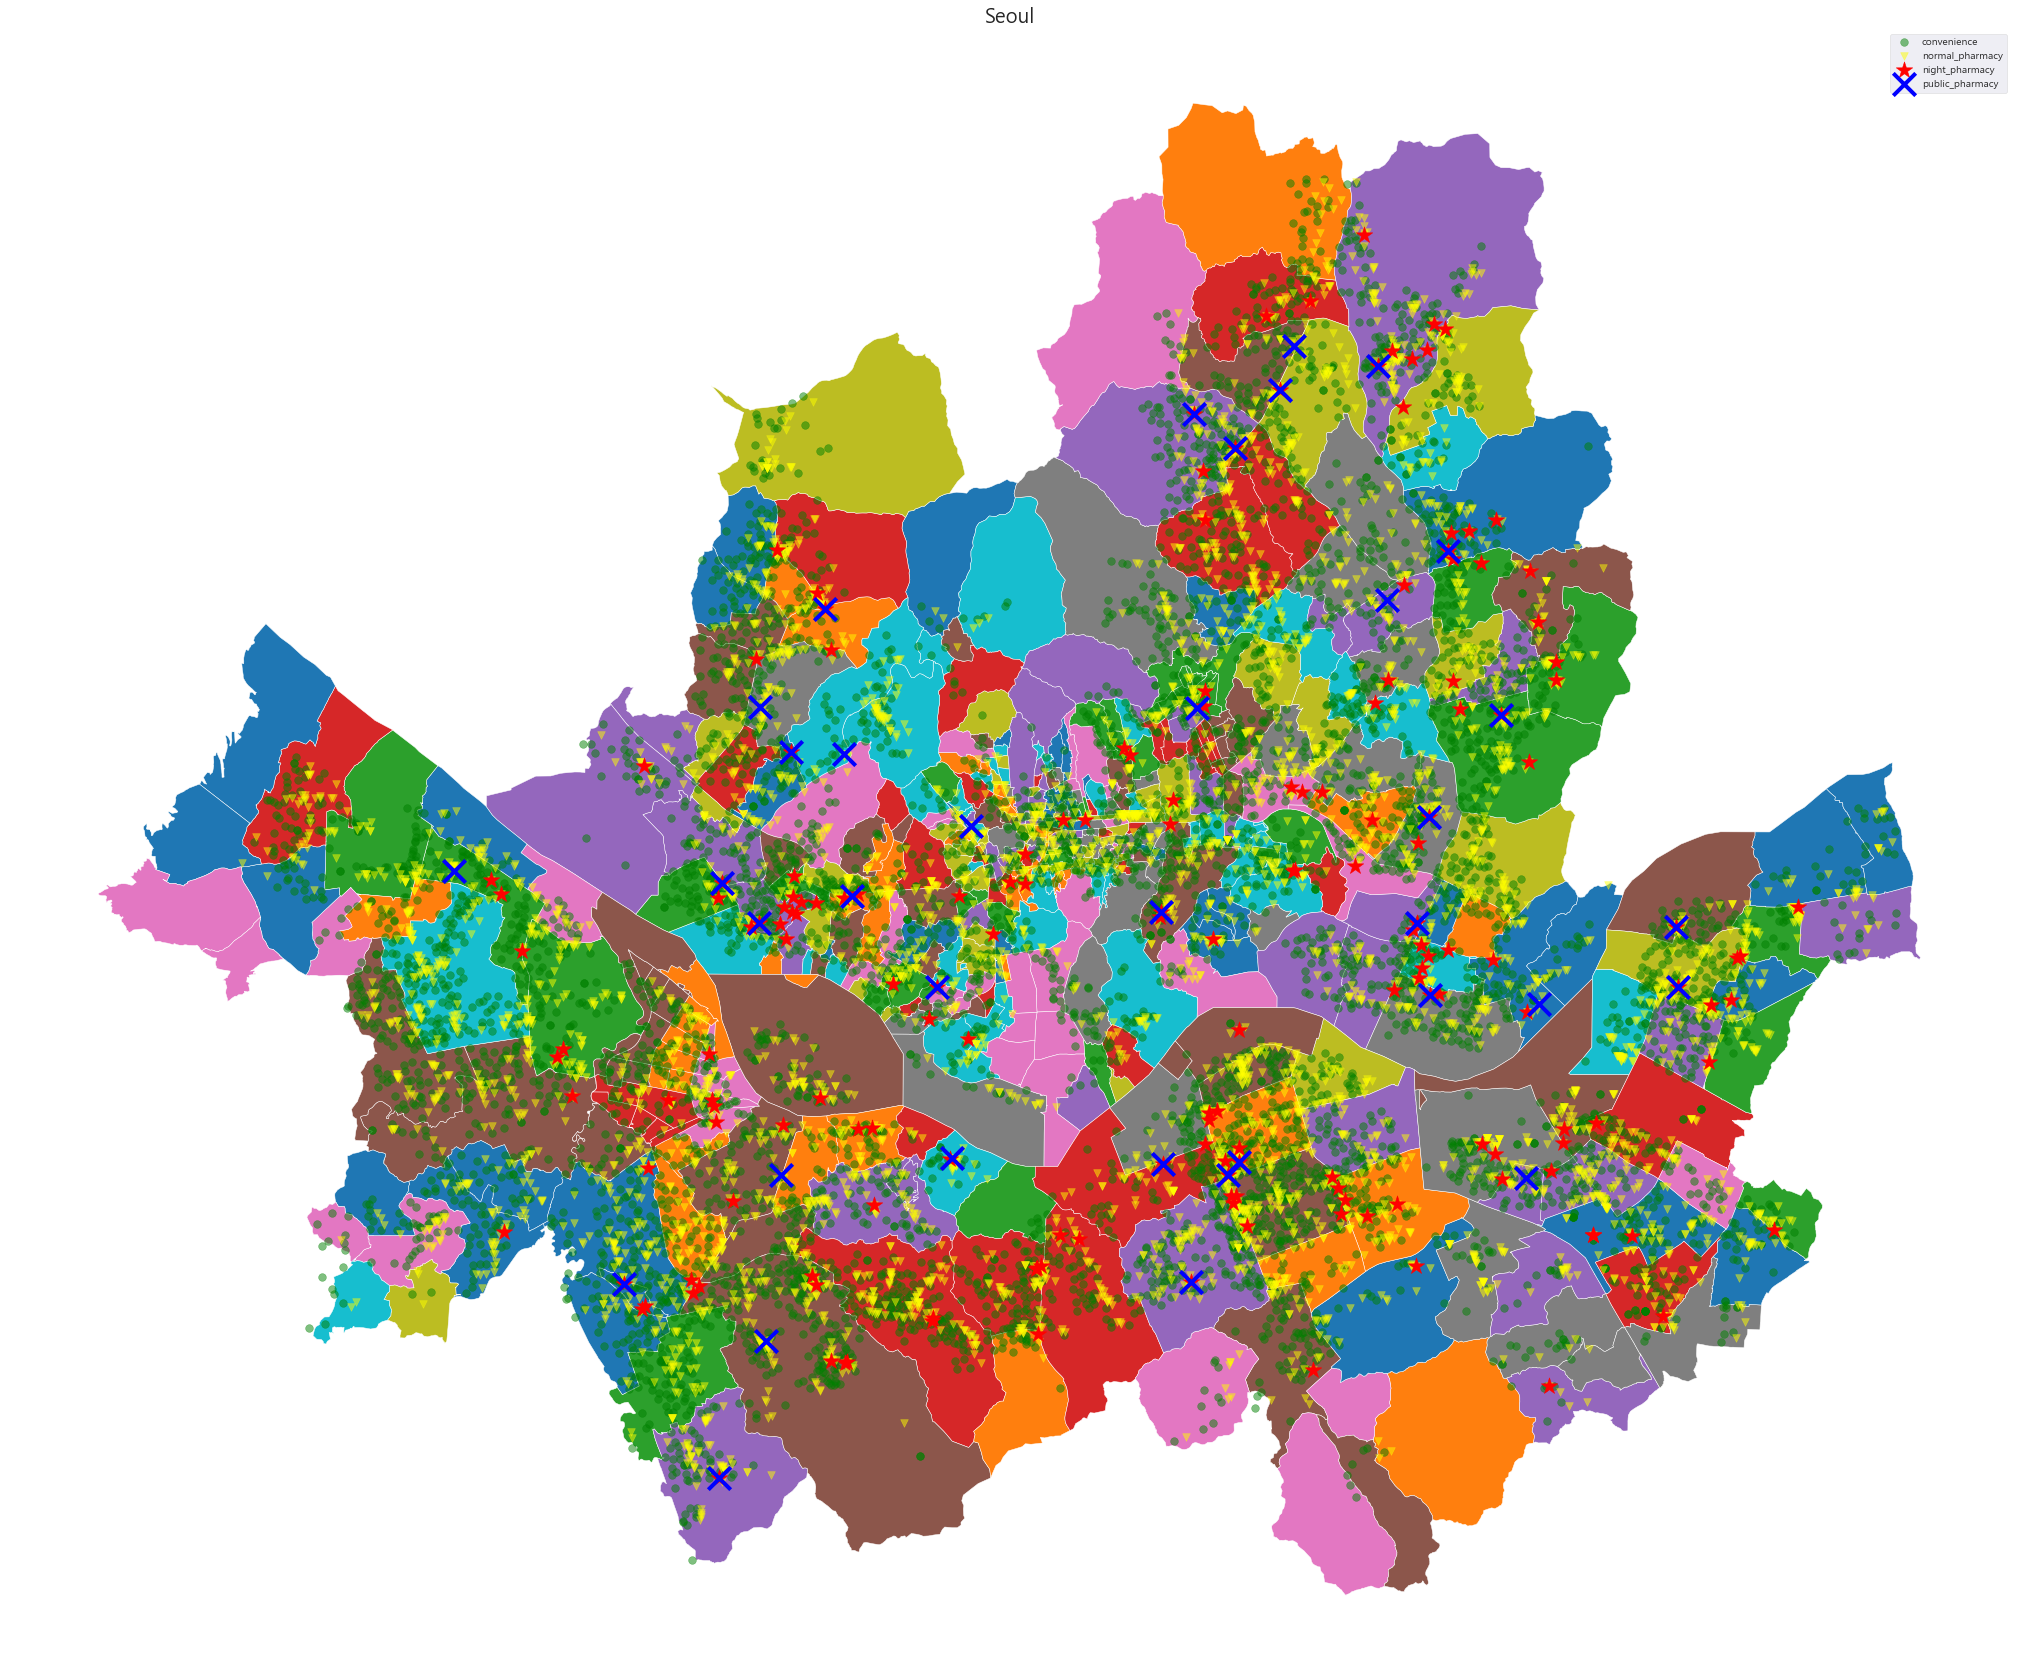

In [108]:
ax = seoul_EMD.plot(column="EMD_KOR_NM", figsize=(32,32), alpha=1)
convenience2.plot(ax=ax, marker='o', color='green', label='convenience', alpha=0.5, markersize=60)
pharmacy2.plot(ax=ax, marker='v', color='yellow', label='normal_pharmacy', alpha=0.5, markersize=60)
df.plot(ax=ax, marker='*', color='red', label='night_pharmacy', markersize=300)
public_pharmacy.plot(ax=ax, marker='x', color='blue', label='public_pharmacy', markersize=500)
ax.set_title("Seoul", fontsize=20)
ax.set_axis_off()
plt.legend()
plt.show()

In [179]:
nonpublic_pharmacy = df
#위도 및 경도 차이가 0.00012 이하인 것이 36개(공공심야약국 개수)
temp = []
for i in range(len(public_pharmacy)):
    for j in range(len(df)):
        if abs(public_pharmacy['X'][i] - df['경도'][j]) < 0.00012 or abs(public_pharmacy['Y'][i] - df['위도'][j]) < 0.00012:
            temp.append(j)

nonpublic_pharmacy = df.drop(temp)
nonpublic_pharmacy = nonpublic_pharmacy.reset_index()
nonpublic_pharmacy.head(1)

index      약국명          대표전화                                      도로명주소  \
0      1  365열린약국  02-3666-0784  서울특별시 구로구 남부순환로97길 3, KS프리미어빌딩 105호 (개봉동)   

           월요일          화요일          수요일          목요일          금요일  \
0  08:30~22:30  08:30~22:30  08:30~22:30  08:30~22:30  08:30~22:30   

           토요일          일요일          공휴일          경도         위도  \
0  08:30~22:30  08:30~22:30  08:30~22:30  126.858255  37.493996   

                         geometry  
0  POINT (943271.271 1944053.577)

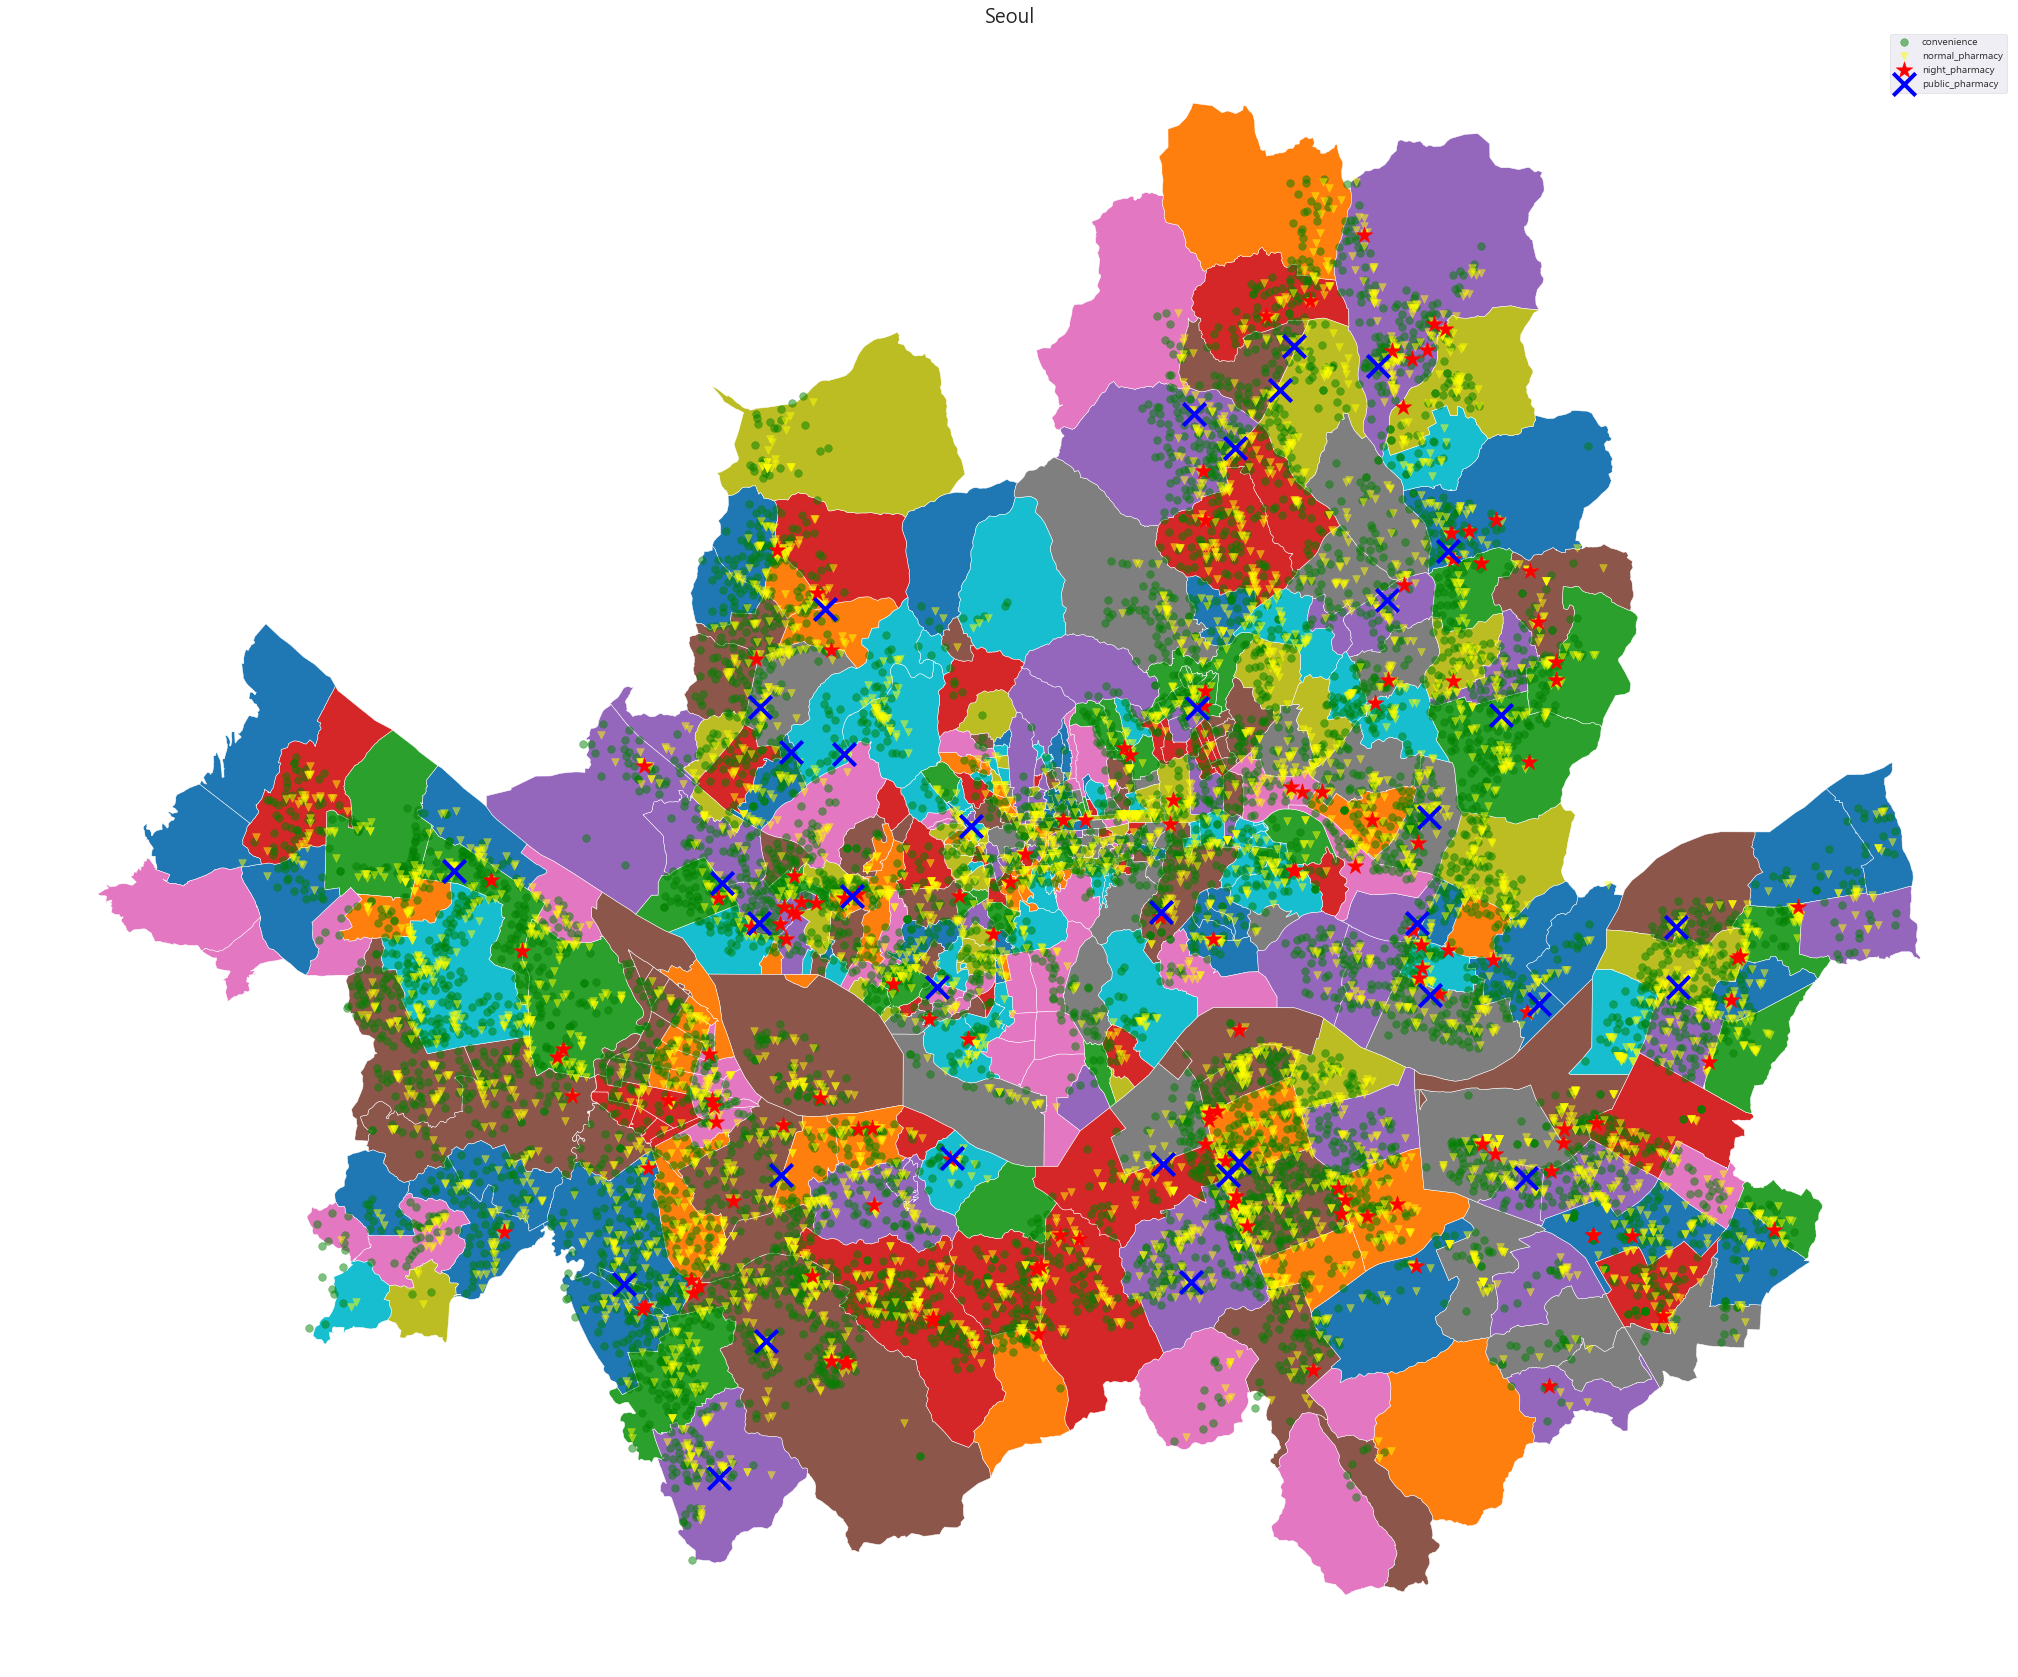

In [183]:
ax = seoul_EMD.plot(column="EMD_KOR_NM", figsize=(32,32), alpha=1)
convenience2.plot(ax=ax, marker='o', color='green', label='convenience', alpha=0.5, markersize=60)
pharmacy2.plot(ax=ax, marker='v', color='yellow', label='normal_pharmacy', alpha=0.5, markersize=60)
nonpublic_pharmacy.plot(ax=ax, marker='*', color='red', label='night_pharmacy', markersize=300)
public_pharmacy.plot(ax=ax, marker='x', color='blue', label='public_pharmacy', markersize=500)
ax.set_title("Seoul", fontsize=20)
ax.set_axis_off()
plt.legend()
plt.show()

전처리 완료된 데이터 저장

In [184]:
convenience2.to_csv("PreprocessData/convenience.csv")
pharmacy.to_csv("PreprocessData/pharmacy.csv")
nonpublic_pharmacy.to_csv("PreprocessData/nonpublic_pharmacy.csv")
public_pharmacy.to_csv("PreprocessData/public_pharmacy.csv")